In [219]:
import os
import glob
import seaborn as sns

os.chdir(r'C:\Users\ejpay\Group Project - ONS\Parking\Parking\anpr_data_anon') #Set this as the directory to where
#you have downloaded the files
files = glob.glob('*.csv') #Retrieve all CSVs


li = [] #Where we will store all the dataframes

for index, filename in enumerate(files):
    df = pd.read_csv(filename, index_col=None, header=0)
    df["file"] = filename  
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

C:\Users\ejpay\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [220]:
frame

,Category,Lane Name,Time,Date,TimeStamp,Company,LP,file
0,Contractors,Bollard Camera,04:06:40 (0:00),2019-01-01,1.546316e+09,Non Staff,1,anpr_01012019_07012019_anon.csv
1,Contractors,Exit Barrier,04:07:12 (0:00),2019-01-01,1.546316e+09,Non Staff,1,anpr_01012019_07012019_anon.csv
2,Contractors,Exit Barrier,04:13:07 (0:00),2019-01-01,1.546316e+09,Non Staff,1,anpr_01012019_07012019_anon.csv
3,Unknown,Exit Barrier,04:40:15 (0:00),2019-01-01,NaN,Unknown,2,anpr_01012019_07012019_anon.csv
4,Unknown,Exit Barrier,05:39:45 (0:00),2019-01-01,NaN,Unknown,2,anpr_01012019_07012019_anon.csv
5,Unknown,Bollard Camera,05:46:17 (0:00),2019-01-01,NaN,Unknown,3,anpr_01012019_07012019_anon.csv
6,Unknown,Entrance Barrier,05:46:28 (0:00),2019-01-01,NaN,Unknown,3,anpr_01012019_07012019_anon.csv
7,Employees,Exit Barrier,05:52:24 (0:00),2019-01-01,1.546322e+09,Non Staff,4,anpr_01012019_07012019_anon.csv
8,Unknown,Bollard Camera,06:28:30 (0:00),2019-01-01,NaN,Unknown,5,anpr_01012019_07012019_anon.csv
9,Employees,Bollard Camera,10:11:49 (0:00),2019-01-01,1.546338e+09,Staff,6,anpr_01012019_07012019_anon.csv


In [191]:
frame["Time_Cleansed"] = frame["Time"].str[:8]

In [192]:
frame["Date_Time"] = frame["Date"]+" "+frame["Time_Cleansed"]

In [193]:
frame["Date_Time"] = pd.to_datetime(frame["Date_Time"])

In [194]:
frame = frame.sort_values(by=['Date_Time'])

In [195]:
frame = frame.drop(frame.iloc[frame["Date"].isnull().values].index.values)

In [196]:
frame

,Category,Lane Name,Time,Date,TimeStamp,Company,LP,file,Time_Cleansed,Date_Time
0,Contractors,Bollard Camera,04:06:40 (0:00),2019-01-01,1.546316e+09,Non Staff,1,anpr_01012019_07012019_anon.csv,04:06:40,2019-01-01 04:06:40
1,Contractors,Exit Barrier,04:07:12 (0:00),2019-01-01,1.546316e+09,Non Staff,1,anpr_01012019_07012019_anon.csv,04:07:12,2019-01-01 04:07:12
2,Contractors,Exit Barrier,04:13:07 (0:00),2019-01-01,1.546316e+09,Non Staff,1,anpr_01012019_07012019_anon.csv,04:13:07,2019-01-01 04:13:07
3,Unknown,Exit Barrier,04:40:15 (0:00),2019-01-01,NaN,Unknown,2,anpr_01012019_07012019_anon.csv,04:40:15,2019-01-01 04:40:15
4,Unknown,Exit Barrier,05:39:45 (0:00),2019-01-01,NaN,Unknown,2,anpr_01012019_07012019_anon.csv,05:39:45,2019-01-01 05:39:45
5,Unknown,Bollard Camera,05:46:17 (0:00),2019-01-01,NaN,Unknown,3,anpr_01012019_07012019_anon.csv,05:46:17,2019-01-01 05:46:17
6,Unknown,Entrance Barrier,05:46:28 (0:00),2019-01-01,NaN,Unknown,3,anpr_01012019_07012019_anon.csv,05:46:28,2019-01-01 05:46:28
7,Employees,Exit Barrier,05:52:24 (0:00),2019-01-01,1.546322e+09,Non Staff,4,anpr_01012019_07012019_anon.csv,05:52:24,2019-01-01 05:52:24
8,Unknown,Bollard Camera,06:28:30 (0:00),2019-01-01,NaN,Unknown,5,anpr_01012019_07012019_anon.csv,06:28:30,2019-01-01 06:28:30
9,Employees,Bollard Camera,10:11:49 (0:00),2019-01-01,1.546338e+09,Staff,6,anpr_01012019_07012019_anon.csv,10:11:49,2019-01-01 10:11:49


In [197]:
frame["value"] = 1
frame["status"] = "enter"
frame.loc[frame['Lane Name'] == 'Exit Barrier', 'value'] = -1
frame.loc[frame['Lane Name'] == 'Exit Barrier', 'status'] = "exit"

In [213]:
visual = frame[["value","status"]].groupby([frame.Date_Time.dt.week,'status']).sum().reset_index()

In [217]:
visual

,Date_Time,status,value
0,1,enter,12492
1,1,exit,-6163
2,2,enter,29357
3,2,exit,-13354
4,3,enter,29373
5,3,exit,-13436
6,4,enter,28688
7,4,exit,-13532
8,5,enter,24525
9,5,exit,-11913


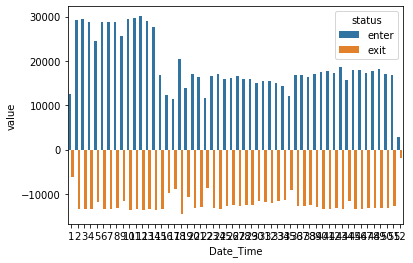

In [216]:
sns.barplot(x="Date_Time", y="value",hue="status", data=visual)